# Setup

### Imports

In [49]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### Activation Functions

In [50]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def heaviside(z):
    return (z >= 0).astype(z.dtype)

# Image Classifier

### Importing Dataset and Splitting Into Test and Train

In [51]:
X_train_full = np.load('./datasets/smiley/smiley_X.npy') 
X_test = X_train_full
y_train_full = np.load('./datasets/smiley/smiley_y.npy').astype(int)
y_test = y_train_full

X_valid, X_train = X_train_full[:72], X_train_full[72:]
y_valid, y_train = y_train_full[:72], y_train_full[72:]
X_test = X_test

class_names = ["Happy", "Sad"]

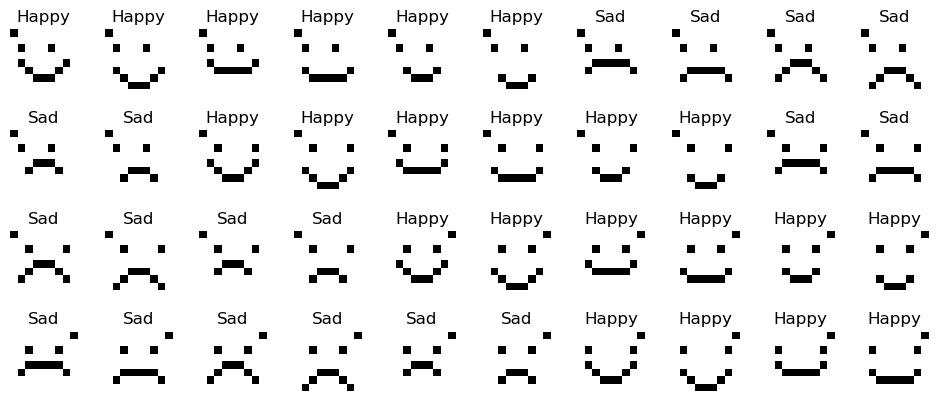

In [52]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Making the Models

In [53]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [55]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 1s 162ms/step - loss: 0.6742 - accuracy: 0.5972 - val_loss: 0.6664 - val_accuracy: 0.6806
Epoch 2/30
3/3 [==============================] - 0s 25ms/step - loss: 0.6619 - accuracy: 0.6528 - val_loss: 0.6557 - val_accuracy: 0.7361
Epoch 3/30
3/3 [==============================] - 0s 27ms/step - loss: 0.6502 - accuracy: 0.6806 - val_loss: 0.6457 - val_accuracy: 0.7917
Epoch 4/30
3/3 [==============================] - 0s 25ms/step - loss: 0.6397 - accuracy: 0.7778 - val_loss: 0.6355 - val_accuracy: 0.8194
Epoch 5/30
3/3 [==============================] - 0s 24ms/step - loss: 0.6285 - accuracy: 0.7917 - val_loss: 0.6252 - val_accuracy: 0.8472
Epoch 6/30
3/3 [==============================] - 0s 25ms/step - loss: 0.6178 - accuracy: 0.8472 - val_loss: 0.6157 - val_accuracy: 0.8472
Epoch 7/30
3/3 [==============================] - 0s 25ms/step - loss: 0.6074 - accuracy: 0.8472 - val_loss: 0.6065 - val_accuracy: 0.8611
Epoch 8/30
3/3 [==========

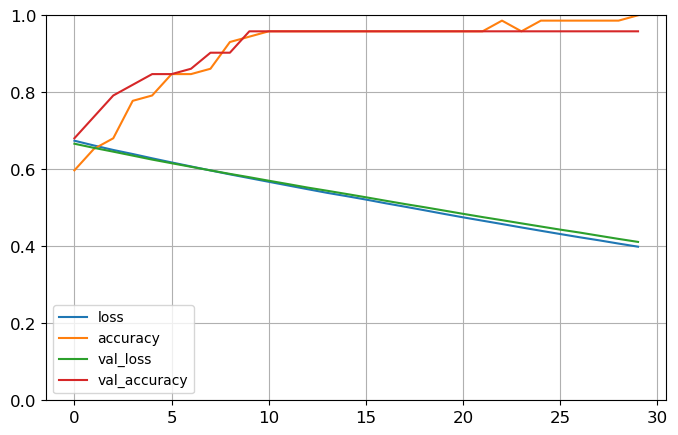

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.9792


[0.40177807211875916, 0.9791666865348816]

# Hyperparameter Experimentation

In [58]:
Models = [
    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")])),

    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(500, activation="sigmoid"),
    keras.layers.Dense(50, activation="sigmoid"),
    keras.layers.Dense(2, activation="softmax")])),

    (keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")])),
]

In [59]:
history = []
for model in Models:
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    history.append(model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid)))

Epoch 1/100
3/3 [==============================] - 1s 379ms/step - loss: 0.7233 - accuracy: 0.3750 - val_loss: 0.7026 - val_accuracy: 0.5278
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.7110 - accuracy: 0.4306 - val_loss: 0.6904 - val_accuracy: 0.5694
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6982 - accuracy: 0.4722 - val_loss: 0.6798 - val_accuracy: 0.5972
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6864 - accuracy: 0.5556 - val_loss: 0.6689 - val_accuracy: 0.5972
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6746 - accuracy: 0.6111 - val_loss: 0.6572 - val_accuracy: 0.6389
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6624 - accuracy: 0.6944 - val_loss: 0.6465 - val_accuracy: 0.6806
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6519 - accuracy: 0.7083 - val_loss: 0.6360 - val_accuracy: 0.7361
Epoch 8/100
3/3 [==

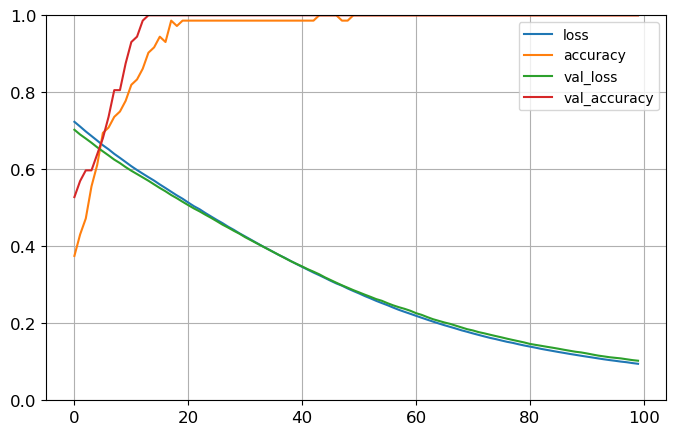

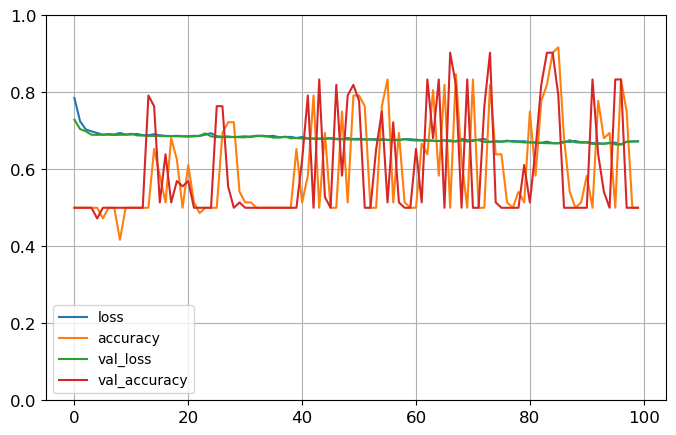

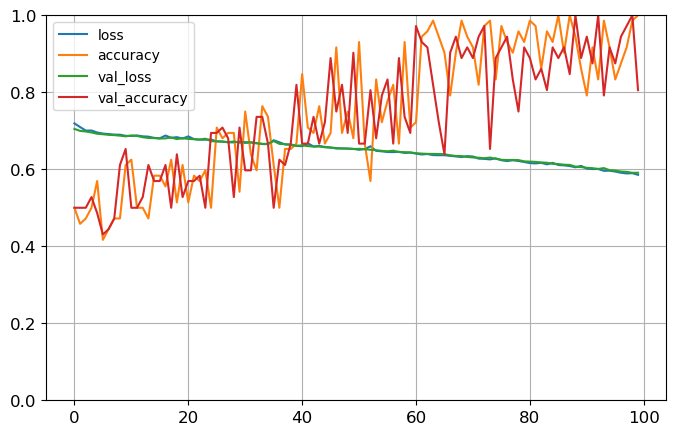

In [60]:
for hist in history:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Experimenting with 3 different classifiers using training and testing sets

### 50/50 Train Test Split

Epoch 1/100
2/2 [==============================] - 1s 291ms/step - loss: 0.7232 - accuracy: 0.4722 - val_loss: 0.7253 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 0.7110 - accuracy: 0.5000 - val_loss: 0.7142 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6984 - accuracy: 0.5556 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6832 - accuracy: 0.5556 - val_loss: 0.6807 - val_accuracy: 0.5278
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6710 - accuracy: 0.6667 - val_loss: 0.6676 - val_accuracy: 0.6944
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6602 - accuracy: 0.6667 - val_loss: 0.6593 - val_accuracy: 0.6944
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6470 - accuracy: 0.6944 - val_loss: 0.6509 - val_accuracy: 0.6944
Epoch 8/100
2/2 [==

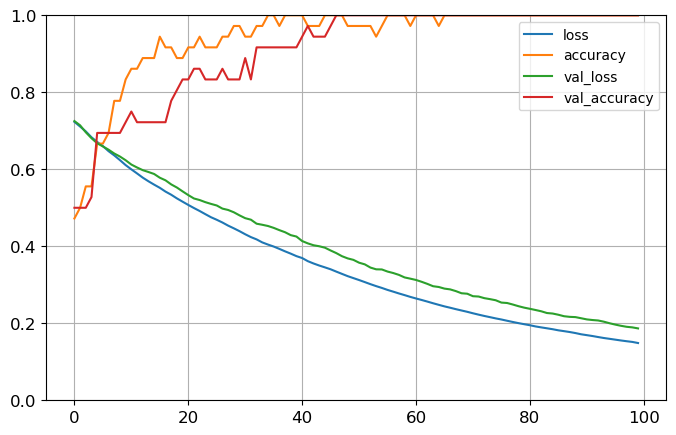

3/3 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 1.0000


[0.19073309004306793, 1.0]

In [61]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

X_test1, X_train1 = X_train_full[:72], X_train_full[72:]
y_test1, y_train1 = y_train_full[:72], y_train_full[72:]
X_valid1, X_train1 = X_train1[:36], X_train1[36:]
y_valid1, y_train1 = y_train1[:36], y_train1[36:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train1, y_train1, epochs=100, validation_data=(X_valid1, y_valid1)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test1, y_test1)

### 70/30 Train Test Split

Epoch 1/100
2/2 [==============================] - 1s 290ms/step - loss: 0.6731 - accuracy: 0.6078 - val_loss: 0.6742 - val_accuracy: 0.5200
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6637 - accuracy: 0.6471 - val_loss: 0.6667 - val_accuracy: 0.5600
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6549 - accuracy: 0.6471 - val_loss: 0.6590 - val_accuracy: 0.5800
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6452 - accuracy: 0.6667 - val_loss: 0.6516 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6359 - accuracy: 0.7255 - val_loss: 0.6441 - val_accuracy: 0.6200
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6272 - accuracy: 0.7647 - val_loss: 0.6367 - val_accuracy: 0.6400
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6178 - accuracy: 0.7647 - val_loss: 0.6292 - val_accuracy: 0.6400
Epoch 8/100
2/2 [==

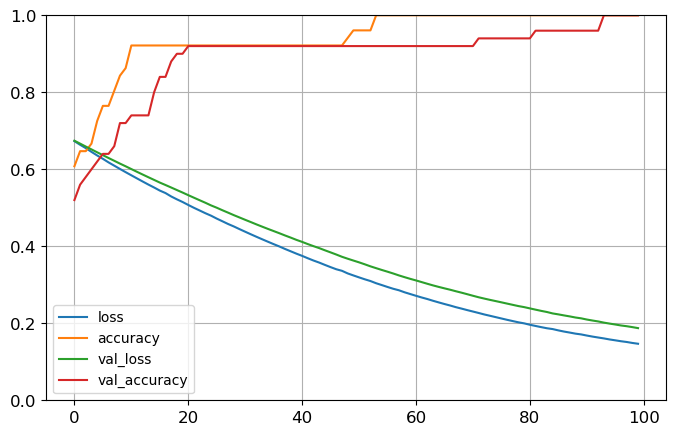

2/2 [==============================] - 0s 5ms/step - loss: 0.1782 - accuracy: 1.0000


[0.1781700998544693, 1.0]

In [62]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

X_test2, X_train2 = X_train_full[:43], X_train_full[43:]
y_test2, y_train2 = y_train_full[:43], y_train_full[43:]
X_valid2, X_train2 = X_train2[:50], X_train2[50:]
y_valid2, y_train2 = y_train2[:50], y_train2[50:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train2, y_train2, epochs=100, validation_data=(X_valid2, y_valid2)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test2, y_test2)

### 40/60 Train Test Split

Epoch 1/100
1/1 [==============================] - 1s 662ms/step - loss: 1.0918 - accuracy: 0.4138 - val_loss: 0.9998 - val_accuracy: 0.5862
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0740 - accuracy: 0.4138 - val_loss: 0.9882 - val_accuracy: 0.5862
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 1.0568 - accuracy: 0.4138 - val_loss: 0.9770 - val_accuracy: 0.6207
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0402 - accuracy: 0.4138 - val_loss: 0.9662 - val_accuracy: 0.6207
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0241 - accuracy: 0.4138 - val_loss: 0.9558 - val_accuracy: 0.6552
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 1.0086 - accuracy: 0.4138 - val_loss: 0.9457 - val_accuracy: 0.6897
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 0.9936 - accuracy: 0.4483 - val_loss: 0.9359 - val_accuracy: 0.6897
Epoch 8/100
1/1 [==

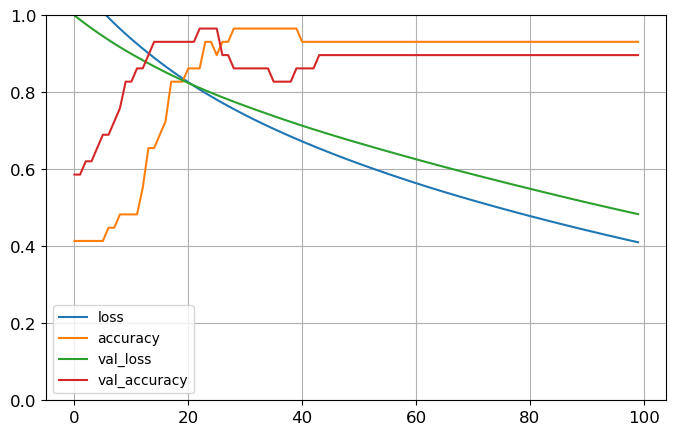

3/3 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.9186


[0.5028166770935059, 0.9186046719551086]

In [63]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

X_test3, X_train3 = X_train_full[:86], X_train_full[86:]
y_test3, y_train3 = y_train_full[:86], y_train_full[86:]
X_valid3, X_train3 = X_train3[:29], X_train3[29:]
y_valid3, y_train3 = y_train3[:29], y_train3[29:]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train3, y_train3, epochs=100, validation_data=(X_valid3, y_valid3)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test3, y_test3)

# Convolution Neural Networks

In [64]:
X_train_full = np.load('./datasets/smiley/smiley_X.npy') 
X_test = X_train_full
y_train_full = np.load('./datasets/smiley/smiley_y.npy').astype(int)
y_test = y_train_full

X_valid, X_train = X_train_full[:72], X_train_full[72:]
y_valid, y_train = y_train_full[:72], y_train_full[72:]
X_test = X_test

class_names = ["Happy", "Sad"]

### Building an ANN

Epoch 1/100
3/3 [==============================] - 1s 141ms/step - loss: 2.2419 - accuracy: 0.3472 - val_loss: 2.1734 - val_accuracy: 0.4306
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 2.1478 - accuracy: 0.5000 - val_loss: 2.0881 - val_accuracy: 0.5833
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 2.0529 - accuracy: 0.6111 - val_loss: 2.0075 - val_accuracy: 0.6389
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 1.9650 - accuracy: 0.6944 - val_loss: 1.9295 - val_accuracy: 0.7083
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 1.8795 - accuracy: 0.7361 - val_loss: 1.8544 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 1.7977 - accuracy: 0.7500 - val_loss: 1.7810 - val_accuracy: 0.7778
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 1.7176 - accuracy: 0.7639 - val_loss: 1.7111 - val_accuracy: 0.7778
Epoch 8/100
3/3 [==

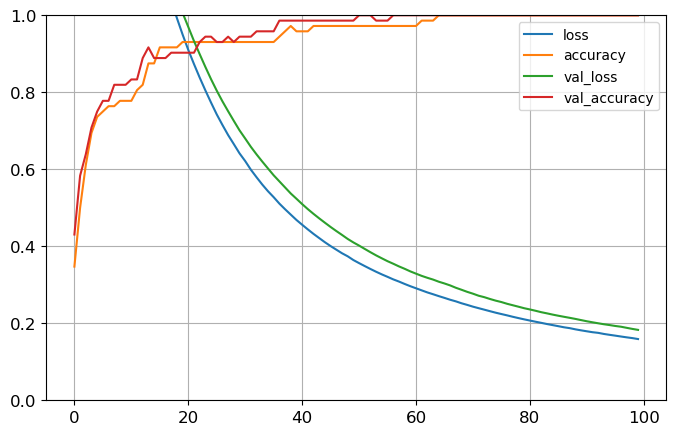

5/5 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 1.0000


[0.17005978524684906, 1.0]

In [65]:
keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[9, 9, 1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = (model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

In [66]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


### Building a CNN

In [67]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [68]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 2s 14ms/step - loss: 2.1919 - accuracy: 0.5417
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 1.4889 - accuracy: 0.9167
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6087 - accuracy: 0.9167
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2988 - accuracy: 0.9167
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1953 - accuracy: 0.9167
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1434 - accuracy: 0.9861
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0869 - accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0528 - accuracy: 1.0000
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 11/50
3/3 [=====================

In [69]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [70]:
classifications = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [71]:
print(classifications[3])

[9.9999827e-01 1.6363980e-06 1.8945510e-17 1.6168848e-15 2.1115582e-17
 1.5164749e-21 2.8683179e-20 1.2390246e-20 4.0874733e-22 2.6378887e-18]


In [72]:
np.argmax(classifications[3])

0

In [73]:
np.max(classifications[3])

0.9999983

In [74]:
class_names[np.argmax(classifications[3])]

'Happy'

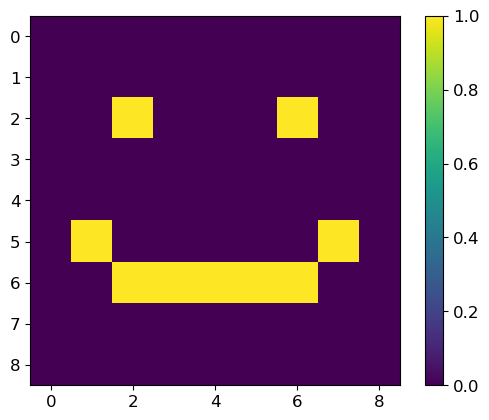

In [75]:
plt.imshow(X_test[3].reshape(9, 9))
plt.colorbar()
plt.grid(False)

1/1 [==============================] - 0s 29ms/step


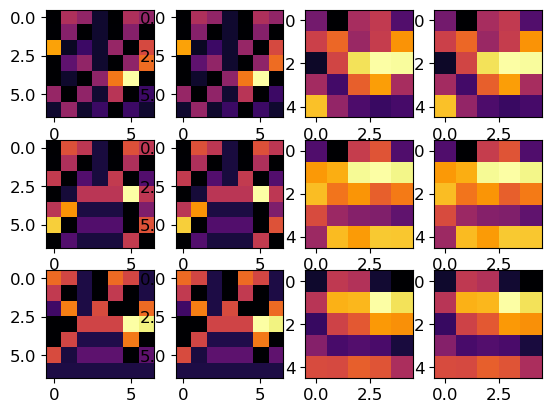

In [76]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Testing Different CNN Architechtures

Epoch 1/50
3/3 [==============================] - 1s 156ms/step - loss: 2.2326 - accuracy: 0.5278 - val_loss: 1.7896 - val_accuracy: 0.9167
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 1.5962 - accuracy: 0.9167 - val_loss: 0.8439 - val_accuracy: 0.9167
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.6737 - accuracy: 0.9167 - val_loss: 0.3198 - val_accuracy: 0.9167
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 0.3010 - accuracy: 0.9167 - val_loss: 0.2142 - val_accuracy: 0.9167
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.2453 - accuracy: 0.9167 - val_loss: 0.1502 - val_accuracy: 0.9861
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.2434 - accuracy: 0.7917 - val_loss: 0.1552 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 0.1197 - accuracy: 0.9861 - val_loss: 0.1582 - val_accuracy: 0.9167
Epoch 8/50
3/3 [==========

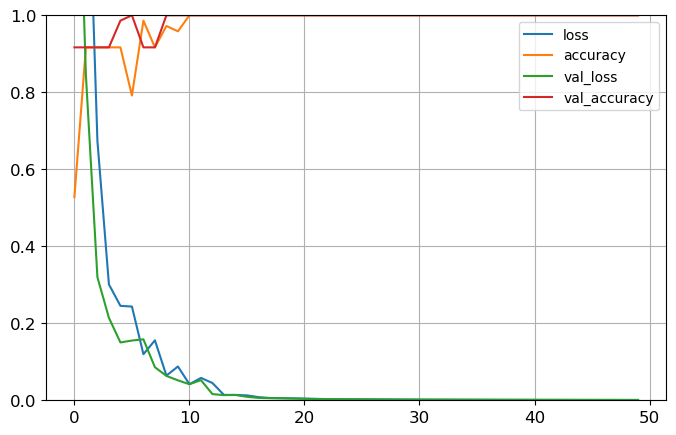


Test accuracy: 1.0


In [77]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = (model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

Epoch 1/50
3/3 [==============================] - 1s 157ms/step - loss: 1.8446 - accuracy: 0.2500 - val_loss: 0.7940 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.7739 - accuracy: 0.5000 - val_loss: 0.7427 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.7385 - accuracy: 0.5000 - val_loss: 0.7247 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 0.7313 - accuracy: 0.5000 - val_loss: 0.7185 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 0.7199 - accuracy: 0.5000 - val_loss: 0.7180 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.7163 - accuracy: 0.5000 - val_loss: 0.7126 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 0.7106 - accuracy: 0.5000 - val_loss: 0.7108 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

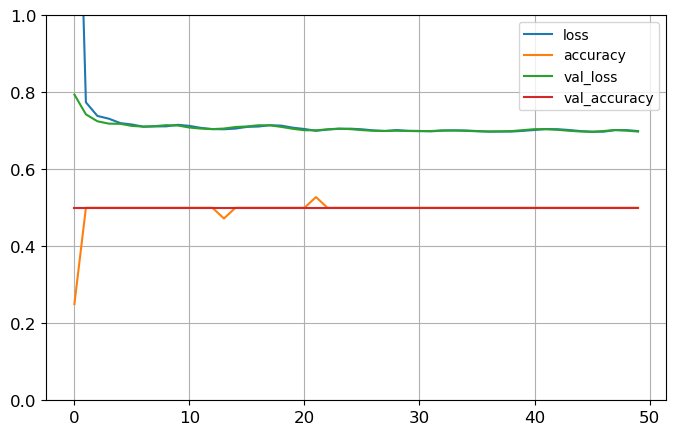


Test accuracy: 0.5


In [78]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = (model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

Epoch 1/50
3/3 [==============================] - 1s 158ms/step - loss: 2.2412 - accuracy: 0.2500 - val_loss: 1.7995 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 1.7008 - accuracy: 0.5000 - val_loss: 1.4173 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 1.3524 - accuracy: 0.5000 - val_loss: 1.1469 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 1.1008 - accuracy: 0.7500 - val_loss: 0.9614 - val_accuracy: 0.9306
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.9290 - accuracy: 0.9167 - val_loss: 0.8290 - val_accuracy: 0.9167
Epoch 6/50
3/3 [==============================] - 0s 24ms/step - loss: 0.8090 - accuracy: 0.9444 - val_loss: 0.7412 - val_accuracy: 0.9167
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.7250 - accuracy: 0.9167 - val_loss: 0.6805 - val_accuracy: 0.9167
Epoch 8/50
3/3 [==========

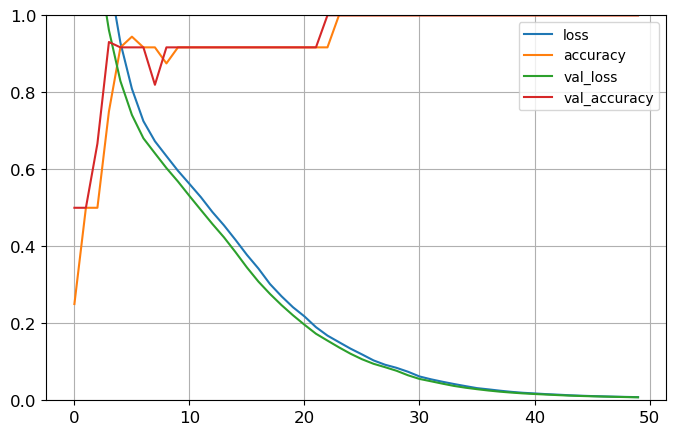


Test accuracy: 1.0


In [79]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'),
  tf.keras.layers.MaxPooling2D(1, 1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = (model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid)))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)